# TAMU Datathon 2021 :: Bloomberg INDG Challenge

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
BASE_DIR = '/content/drive/MyDrive/indg-fed-register/'

## Imports

In [64]:
import numpy as np
import pandas as pd
import glob
import os
import seaborn as sns
from tqdm import tqdm

from bs4 import BeautifulSoup
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF, TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity

##How to efficiently extract SUBJECT, SUM (summary), SUPLINF text from XML files for each year?

In [4]:
# There are 3618 XML files in the docs folder
print(len([name for name in os.listdir(BASE_DIR+r"docs") if os.path.isfile(os.path.join(BASE_DIR+r"docs", name))]))

3618


In [5]:
# Find the most efficient way to get content from the set of XML files for each year
count = 0
for s in ['01', '02', '03', '04', '05', '06', '07', '08', '09']:
    local = 0
    filelist = glob.glob(BASE_DIR+f"docs/{s}-*.xml")
    count += len(filelist)
    local += count

    filelist = glob.glob(BASE_DIR+f"docs/E{s[1]}*.xml")
    count += len(filelist)
    print(s, local)

for i in range(2010, 2022):
    local = 0
    s = str(i)
    filelist = glob.glob(BASE_DIR+f"docs/{s}-*.xml")
    count += len(filelist)
    local += len(filelist)

    filelist = glob.glob(BASE_DIR+f"docs/C1-{s}-*.xml")
    count += len(filelist)
    local += len(filelist)
    filelist = glob.glob(BASE_DIR+f"docs/C2-{s}-*.xml")
    count += len(filelist)
    local += len(filelist)
    filelist = glob.glob(BASE_DIR+f"docs/R1-{s}-*.xml")
    count += len(filelist)
    local += len(filelist)

    print(s, local)
# print(count)

filelist = glob.glob(BASE_DIR+f"docs/R3-*.xml") # 2003, only 1 file
count += len(filelist)
print(count) # 3617 files and 1 file is a very short amendment file

01 170
02 305
03 461
04 628
05 743
06 817
07 896
08 1014
09 1177
2010 201
2011 253
2012 203
2013 170
2014 181
2015 156
2016 189
2017 128
2018 188
2019 239
2020 286
2021 81
3617


##Panel for years 2001-2006

In [24]:
# Use rules from above to gather lines from the XML docs for the years 2001-2006
panel_01_06 = []

for s in ['01', '02', '03', '04', '05', '06']:
    filelist = glob.glob(BASE_DIR+f"docs/{s}-*.xml")
    filelist_E = glob.glob(BASE_DIR+f"docs/E{s[1]}*.xml")
    print(f"year: {s}, # of files: {len(filelist) + len(filelist_E)}")
    for filename in tqdm(filelist + filelist_E):
        with open(filename, encoding="utf-8") as open_file:
            content = open_file.read()
            
            soup = BeautifulSoup(content, "xml")
            # Use soup to collect SUBJECT and SUM (summary) text into a list
            panel_01_06.append(soup.find('SUBJECT').get_text())
            if soup.find('SUM') is not None:
                panel_01_06.append(soup.find('SUM').get_text())
            #if soup.find('SUPLINF') is not None: # do not use SUPLINF as it dilutes the effectiveness
            #    panel_01_06.append(soup.find('SUPLINF').get_text())                
            # print(filename) # debug
            # print(soup.find('SUBJECT').get_text())
            # print(soup.find('SUM').get_text())

year: 01, # of files: 170


100%|██████████| 170/170 [00:04<00:00, 35.17it/s]


year: 02, # of files: 135


100%|██████████| 135/135 [00:04<00:00, 29.34it/s]


year: 03, # of files: 156


100%|██████████| 156/156 [00:05<00:00, 27.22it/s]


year: 04, # of files: 167


100%|██████████| 167/167 [00:06<00:00, 23.98it/s]


year: 05, # of files: 120


100%|██████████| 120/120 [00:04<00:00, 25.80it/s]


year: 06, # of files: 125


100%|██████████| 125/125 [00:04<00:00, 28.84it/s]


##Panel for years 2007-2012

In [25]:
# Use rules from above to gather lines from the XML docs for the years 2007-2012
panel_07_12 = []
for s in ['07', '08', '09']:
    filelist = glob.glob(BASE_DIR+f"docs/{s}-*.xml")
    filelist_E = glob.glob(BASE_DIR+f"docs/E{s[1]}*.xml")

    print(f"year: {s}, # of files: {len(filelist) + len(filelist_E)}")
    for filename in tqdm(filelist + filelist_E):
        with open(filename, encoding="utf-8") as open_file:
            content = open_file.read()
            
            soup = BeautifulSoup(content, "xml")
            panel_07_12.append(soup.find('SUBJECT').get_text())
            if soup.find('SUM') is not None:
                panel_07_12.append(soup.find('SUM').get_text())

for i in range(2010, 2013):
    s = str(i)
    filelist = glob.glob(BASE_DIR+f"docs/{s}-*.xml")
    filelist += glob.glob(BASE_DIR+f"docs/C1-{s}-*.xml")
    filelist += glob.glob(BASE_DIR+f"docs/C2-{s}-*.xml")
    filelist += glob.glob(BASE_DIR+f"docs/R1-{s}-*.xml")

    print(f"year: {s}, # of files: {len(filelist)}")
    for filename in tqdm(filelist):
        with open(filename, encoding="utf-8") as open_file:
            content = open_file.read()
            
            soup = BeautifulSoup(content, "xml")
            panel_07_12.append(soup.find('SUBJECT').get_text())
            if soup.find('SUM') is not None:
                panel_07_12.append(soup.find('SUM').get_text())            

year: 07, # of files: 141


100%|██████████| 141/141 [00:06<00:00, 22.32it/s]


year: 08, # of files: 163


100%|██████████| 163/163 [00:06<00:00, 24.27it/s]


year: 09, # of files: 164


100%|██████████| 164/164 [00:07<00:00, 21.57it/s]


year: 2010, # of files: 201


100%|██████████| 201/201 [00:13<00:00, 15.07it/s]


year: 2011, # of files: 253


100%|██████████| 253/253 [00:17<00:00, 14.27it/s]


year: 2012, # of files: 203


100%|██████████| 203/203 [00:14<00:00, 14.34it/s]


##Panel for years 2013-2021

In [44]:
# Use rules from above to gather lines from the XML docs for the years 2013-2021
panel_13_21 = []
for i in range(2013, 2022):
    s = str(i)
    filelist = glob.glob(BASE_DIR+f"docs/{s}-*.xml")
    filelist += glob.glob(BASE_DIR+f"docs/C1-{s}-*.xml")
    filelist += glob.glob(BASE_DIR+f"docs/C2-{s}-*.xml")
    filelist += glob.glob(BASE_DIR+f"docs/R1-{s}-*.xml")

    print(f"year: {s}, # of files: {len(filelist)}")
    for filename in tqdm(filelist):
        with open(filename, encoding="utf-8") as open_file:
            content = open_file.read()
            
            soup = BeautifulSoup(content, "xml")
            panel_13_21.append(soup.find('SUBJECT').get_text())
            if soup.find('SUM') is not None:
                panel_13_21.append(soup.find('SUM').get_text())     

year: 2013, # of files: 170


100%|██████████| 170/170 [01:19<00:00,  2.13it/s]


year: 2014, # of files: 181


100%|██████████| 181/181 [01:09<00:00,  2.61it/s]


year: 2015, # of files: 156


100%|██████████| 156/156 [01:01<00:00,  2.55it/s]


year: 2016, # of files: 189


100%|██████████| 189/189 [00:13<00:00, 14.27it/s]


year: 2017, # of files: 128


100%|██████████| 128/128 [00:04<00:00, 27.28it/s]


year: 2018, # of files: 188


100%|██████████| 188/188 [01:11<00:00,  2.63it/s]


year: 2019, # of files: 239


100%|██████████| 239/239 [01:37<00:00,  2.45it/s]


year: 2020, # of files: 286


100%|██████████| 286/286 [00:19<00:00, 14.69it/s]


year: 2021, # of files: 81


100%|██████████| 81/81 [00:24<00:00,  3.36it/s]


##Topic Model using Latent Dirichlet Allocation

https://www.jmlr.org/papers/volume3/blei03a/blei03a.

LDA - a generative probabilistic model for collections of
discrete data such as text corpora.



In [46]:
# Constants
N_TOPICS = 20
MAX_FEATURES = 10000
RANDOM_STATE = 42
N_TOP_WORDS = 10

A_vec = CountVectorizer(max_features = MAX_FEATURES, # only top 10k words by freq
                        lowercase = True,            # remove capitalization
                        ngram_range = (1,2),         # include 1, 2-word phrases
                        min_df=10,   # note: absolute count of documents
                        max_df=0.95, # note: % of docs
                        stop_words='english'
                        )

def display_topics(model, feature_names, no_top_words):
    results = []
    for topic_idx, topic in enumerate(model.components_):
        term_list = [feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
        print("topic %d:" % (topic_idx), term_list)
        results.append(term_list)
    return results    

def process_panel(panel):
    A_vec_tf = A_vec.fit_transform(panel) # A_vec_tf is a sparse matrix
    tf_feature_names_A = A_vec.get_feature_names()

    # This will take a couple of minutes to run...
    lda = LatentDirichletAllocation(n_components=N_TOPICS, random_state=RANDOM_STATE)
    lda.fit(A_vec_tf)
    return display_topics(lda, tf_feature_names_A, N_TOP_WORDS)  

##TfidfVectorizer for years 2001-2021
The TfidfVectorize is used to compare similarilty between topic vectors between panels of document data from different time periods.

In [54]:
# In oder to compare similarity between topic vectors between panels of document data,
# we need a tfidf vectorizer (term frequency) for all the 3 panels that cover
# years 2001-2021
C_vec = TfidfVectorizer(max_features = MAX_FEATURES*2, # only top 20k words by freq
                        lowercase = True,            # remove capitalization
                        ngram_range = (1,2),         # include 1, 2-word phrases
                        min_df=10,   # note: absolute count of documents
                        max_df=0.95, # note: % of docs
                        stop_words='english'
                        )

# print(len(panel_01_06), len(panel_07_12), len(panel_13_21))
g_panel = panel_01_06.copy()
g_panel.extend(panel_07_12)
g_panel.extend(panel_13_21)

# print(len(g_panel))
C_vec_tfidf = C_vec.fit_transform(g_panel)

##20 Topics and Top 10 words from panel for years 2001-2006

In [47]:
topics_01_06 = process_panel(panel_01_06)

# Key topics:
# disclosure, Sarbanes Oxley act
# rules audit disclosures
# internal control, disclosure

topic 0: ['form', 'rule', 'transfer', 'amendments', 'variable', 'registered', 'securities', 'summary', 'registration', 'market']
topic 1: ['capital', 'risk', 'based', 'risk based', 'based capital', 'banking', 'guidelines', 'standards', 'treatment', 'agencies']
topic 2: ['edgar', 'filing', 'manual', 'filer', 'filer manual', 'form', 'electronic', 'commission', 'electronic filing', 'revisions']
topic 3: ['rules', 'annual', 'published', 'reports', 'federal register', 'document', 'report', 'register', 'fr', 'amendments']
topic 4: ['act', 'directors', 'disclosure', 'section', 'sarbanes', 'oxley', 'oxley act', 'sarbanes oxley', '2002', 'reports']
topic 5: ['rules', 'audit', 'board', 'rule', 'lending', 'act', 'certain', 'services', 'truth', 'disclosures']
topic 6: ['financial', 'commission', 'amendments', 'accounting', 'rule', 'proposed', 'statements', 'summary', 'electronic', 'private']
topic 7: ['insurance', 'fdic', 'comment', 'deposit insurance', 'deposit', 'act', 'proposed', 'federal', 'fe

##20 Topics and Top 10 words from panel for years 2007-2012

In [48]:
topics_07_12 = process_panel(panel_07_12)

# Key topics
# security based swaps
# credit card fees
# loan, mortgage
# risk capital banking
# risk swaps

topic 0: ['swap', 'security', 'based', 'security based', 'swaps', 'act', 'based swap', 'section', 'dealer', 'major']
topic 1: ['disclosure', 'issuer', 'issuers', 'act', 'section', 'conflict', 'rules', 'exchange', 'rule', 'minerals']
topic 2: ['risk', 'capital', 'banking', 'proposed', 'bank', 'rule', 'section', 'entity', 'covered', 'credit']
topic 3: ['commission', 'market', 'proposed', 'section', 'rules', 'contract', 'trading', 'trade', 'swap', 'information']
topic 4: ['company', 'board', 'holding', 'financial', 'covered', 'rule', 'holding company', 'companies', 'shareholder', 'section']
topic 5: ['swap', 'commission', 'data', 'reporting', 'proposed', 'sdr', 'swaps', 'market', 'rule', 'compliance']
topic 6: ['covered', 'financial', 'margin', 'proposed', 'based', 'risk', 'section', 'compensation', 'rule', 'institution']
topic 7: ['loan', 'mortgage', 'abs', 'assets', 'information', 'rule', 'securitization', 'act', 'loans', 'asset']
topic 8: ['226', 'consumer', 'rate', 'card', 'credit', '

##Dissimilarity between topics in 2001-2006 and 2007-2012

In [112]:
def find_similarity_in_topics(topics_A, topics_B):
    vec_A = []
    vec_B = []
    # first convert the list of topics into a doc
    for topic in topics_A:
        docA = " ".join(topic)
        vec_A.append(C_vec.transform([docA]))
    for topic in topics_B:
        docB = " ".join(topic)
        vec_B.append(C_vec.transform([docB]))
    # find the min distance between each topic in topics_A and topics in topics_B
    min_dist_arr = np.zeros(N_TOPICS)
    min_idx_arr = np.zeros(N_TOPICS)
    for i in range(N_TOPICS):
        min_dist = 10000
        min_idx = -1
        for j in range(N_TOPICS):
            dist = 1 - cosine_similarity(vec_A[i], vec_B[j])[0][0]
            if dist < min_dist:
                min_dist = dist
                min_idx = j
        min_dist_arr[i] = min_dist
        min_idx_arr[i] = int(min_idx)
    return min_dist_arr, min_idx_arr.astype(int)

Mean min distance between topics in 2001-06 and 2007-12: 0.83



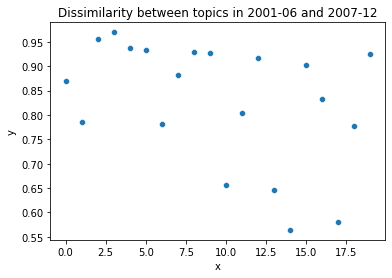

In [113]:
min_dist_arr, _ = find_similarity_in_topics(topics_01_06, topics_07_12)
print("Mean min distance between topics in 2001-06 and 2007-12:", round(min_dist_arr.mean(), 2))
print()
df = pd.DataFrame({"x":range(20), "y": min_dist_arr})
sns.scatterplot(data=df, x="x", y="y").set_title("Dissimilarity between topics in 2001-06 and 2007-12");

# None of the topics come close between the 2 periods!

##Panel for years 2008, 2009, 2016, and 2017

In [30]:
# Setup the panels of documents for 2008, 2009, 2016 and 2017
panel_08 = []
for s in ['08']:
    filelist = glob.glob(BASE_DIR+f"docs/{s}-*.xml")
    filelist_E = glob.glob(BASE_DIR+f"docs/E{s[1]}*.xml")

    print(f"year: {s}, # of files: {len(filelist) + len(filelist_E)}")
    for filename in tqdm(filelist + filelist_E):
        with open(filename, encoding="utf-8") as open_file:
            content = open_file.read()
            
            soup = BeautifulSoup(content, "xml")
            panel_08.append(soup.find('SUBJECT').get_text())
            if soup.find('SUM') is not None:
                panel_08.append(soup.find('SUM').get_text())
panel_09 = []
for s in ['09']:
    filelist = glob.glob(BASE_DIR+f"docs/{s}-*.xml")
    filelist_E = glob.glob(BASE_DIR+f"docs/E{s[1]}*.xml")

    print(f"year: {s}, # of files: {len(filelist) + len(filelist_E)}")
    for filename in tqdm(filelist + filelist_E):
        with open(filename, encoding="utf-8") as open_file:
            content = open_file.read()
            
            soup = BeautifulSoup(content, "xml")
            panel_09.append(soup.find('SUBJECT').get_text())
            if soup.find('SUM') is not None:
                panel_09.append(soup.find('SUM').get_text())

panel_16 = []
for i in range(2016, 2017):
    s = str(i)
    filelist = glob.glob(BASE_DIR+f"docs/{s}-*.xml")
    filelist += glob.glob(BASE_DIR+f"docs/C1-{s}-*.xml")
    filelist += glob.glob(BASE_DIR+f"docs/C2-{s}-*.xml")
    filelist += glob.glob(BASE_DIR+f"docs/R1-{s}-*.xml")

    print(f"year: {s}, # of files: {len(filelist)}")
    for filename in tqdm(filelist):
        with open(filename, encoding="utf-8") as open_file:
            content = open_file.read()
            
            soup = BeautifulSoup(content, "xml")
            panel_16.append(soup.find('SUBJECT').get_text())
            if soup.find('SUM') is not None:
                panel_16.append(soup.find('SUM').get_text())
panel_17 = []
for i in range(2017, 2018):
    s = str(i)
    filelist = glob.glob(BASE_DIR+f"docs/{s}-*.xml")
    filelist += glob.glob(BASE_DIR+f"docs/C1-{s}-*.xml")
    filelist += glob.glob(BASE_DIR+f"docs/C2-{s}-*.xml")
    filelist += glob.glob(BASE_DIR+f"docs/R1-{s}-*.xml")

    print(f"year: {s}, # of files: {len(filelist)}")
    for filename in tqdm(filelist):
        with open(filename, encoding="utf-8") as open_file:
            content = open_file.read()
            
            soup = BeautifulSoup(content, "xml")
            panel_17.append(soup.find('SUBJECT').get_text())
            if soup.find('SUM') is not None:
                panel_17.append(soup.find('SUM').get_text())

year: 08, # of files: 163


100%|██████████| 163/163 [00:06<00:00, 24.06it/s]


year: 09, # of files: 164


100%|██████████| 164/164 [00:07<00:00, 22.34it/s]


year: 2016, # of files: 189


100%|██████████| 189/189 [00:16<00:00, 11.75it/s]


year: 2017, # of files: 128


100%|██████████| 128/128 [00:05<00:00, 22.73it/s]


##20 Topics and Top 10 words for 2008

In [91]:
topics_08 = process_panel(panel_08)

topic 0: ['funds', 'collection', 'availability', 'truth', 'checks', 'lending', 'truth lending', 'currently', 'regarding', 'reflect']
topic 1: ['reserve', 'federal', 'federal reserve', 'office', 'board', 'bank', 'reserve bank', 'regulation', 'amending', 'board amending']
topic 2: ['capital', 'federal', 'bank', 'money', 'treasury', 'federal reserve', 'reserve', 'guidelines', 'board', 'banking']
topic 3: ['commission', 'futures', 'commodity', 'trading', 'commodity futures', 'futures trading', 'trading commission', 'regulations', 'commission commission', 'certain']
topic 4: ['information', 'form', 'electronic', 'revisions', 'securities', 'amendments', 'registration', 'commission', 'data', 'financial']
topic 5: ['investment', 'commission', 'act', 'company', 'securities', 'investment company', 'exchange', 'rules', 'securities exchange', 'registered']
topic 6: ['act', 'rule', 'federal', 'insurance', 'final rule', '2008', 'final', 'consumer', 'proposed', 'disclosures']
topic 7: ['board', 'cred

##20 Topics and Top 10 words for 2009

In [94]:
topics_09 = process_panel(panel_09)

topic 0: ['revisions', 'form', 'changes', 'reflect', 'commission', '2009', 'updated', 'commission adopting', 'summary', 'filing']
topic 1: ['credit', 'board', 'regulation', 'consumer', 'disclosures', 'certain', 'summary', 'staff', 'commentary', 'staff commentary']
topic 2: ['commission', 'amendments', 'rule', 'regulation', 'public', 'act', 'securities', 'exchange', 'proposed', 'practices']
topic 3: ['funds', 'banks', 'regulation', 'availability', 'collection', 'checks', 'transactions', 'certain', 'regulatory', 'subject']
topic 4: ['securities', 'act', 'exchange', 'exchange act', 'securities act', 'securities exchange', 'amendments', '1934', 'act 1934', 'certain']
topic 5: ['rule', 'final', 'capital', 'investment', 'final rule', 'companies', 'holding', 'securities', 'bank', 'new']
topic 6: ['2009', '30', 'institution', '2010', 'rule', 'assessments', 'interim', 'based', 'fdic', 'december']
topic 7: ['2009', 'fr', 'accounting', 'staff', 'release', 'financial', 'technical', 'commission', '

##Dissimilarity between Bush-Obama (08-09)

Mean min distance between topics in 2008 and 2009 (Bush-Obama): 0.69

score for this pair of topics:  0.32794741217977064
['reserve', 'federal', 'federal reserve', 'office', 'board', 'bank', 'reserve bank', 'regulation', 'amending', 'board amending']
['reserve', 'federal reserve', 'federal', 'institutions', 'board', 'depository', 'rate', 'depository institutions', 'office', 'reserve bank']



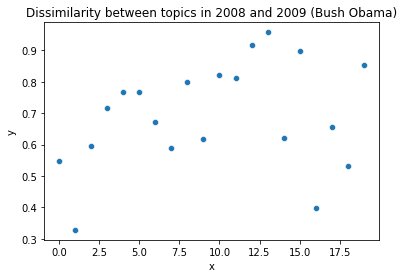

In [114]:
min_dist_arr, min_idx_arr = find_similarity_in_topics(topics_08, topics_09)
print("Mean min distance between topics in 2008 and 2009 (Bush-Obama):", round(min_dist_arr.mean(), 2))
print()
df = pd.DataFrame({"x":range(20), "y": min_dist_arr})
sns.scatterplot(data=df, x="x", y="y").set_title("Dissimilarity between topics in 2008 and 2009 (Bush Obama)");

# Not as dissimilar as between 5 years 2001-06 and 2007-12; in fact one topic has a score below 0.35!
print("score for this pair of topics: ", min_dist_arr[1])
print(topics_08[1])
print(topics_09[min_idx_arr[1]])
print()

##20 Topics and Top 10 words for 2016

In [99]:
topics_16 = process_panel(panel_16)

topic 0: ['commission', 'commodity', 'futures', 'trading', 'commodity futures', 'trading commission', 'futures trading', 'regulations', 'cftc', 'summary']
topic 1: ['final', 'rule', 'final rule', 'act', 'regulations', 'information', 'fdic', 'rules', 'summary', 'banks']
topic 2: ['rule', 'assets', 'board', 'holding', 'billion', 'bank', 'risk', 'companies', 'total', 'bank holding']
topic 3: ['securities', 'exchange', 'regulation', 'exchange act', 'securities exchange', 'act', 'rules', 'order', 'requirements', 'commission']
topic 4: ['data', 'swap data', 'security', 'based', 'deposit', 'insured', 'swap', 'based swap', 'security based', 'make']
topic 5: ['requirements', 'disclosure', 'disclosure requirements', 'important', 'systemically important', 'systemically', 'financial', 'registrants', 'standards', 'certain']
topic 6: ['requirements', 'certain', 'mortgage', 'regulations', 'qualified', 'regulation', 'recordkeeping', 'amendments', 'financial', 'section']
topic 7: ['proposed', 'rule', '

##20 Topics and Top 10 words for 2017

In [100]:
topics_17 = process_panel(panel_17)

topic 0: ['amendments', 'certain', 'regulation', 'proposed', 'proposed amendments', 'summary', 'disclosure', 'order', 'proposing', 'provisions']
topic 1: ['board', 'federal', 'reserve', 'federal reserve', 'banks', 'summary board', 'policy', 'reserve banks', 'board governors', 'governors']
topic 2: ['rate', 'board', 'credit', 'federal', 'reserve', 'regulation', 'federal reserve', 'covered', 'amendments', 'governors federal']
topic 3: ['holding', 'financial', 'request', 'bank', 'bank holding', 'changes', 'companies', 'contracts', 'requirements', 'comment']
topic 4: ['2017', 'agenda', 'published', 'federal register', 'register', 'comment', 'regulatory', 'period', 'summary', 'federal']
topic 5: ['regulation', 'act', 'act regulation', 'truth lending', 'lending', 'truth', 'lending act', 'electronic', 'transfer', 'accounts']
topic 6: ['covered', 'final', 'rule', 'final rule', 'federal', 'fdic', 'act', 'occ', 'state', 'company']
topic 7: ['threshold', 'annual', 'increase', 'percentage', 'agenc

Mean min distance between topics in 2016 and 2017 (Obama-Trump): 0.59

0.03728850939637307
['bureau', 'consumer', 'financial', 'consumer financial', 'protection', 'financial protection', 'regulation', 'bureau consumer', 'protection bureau', 'credit']
['bureau', 'consumer', 'rule', 'financial', 'consumer financial', 'financial protection', 'protection', 'regulation', 'bureau consumer', 'protection bureau']



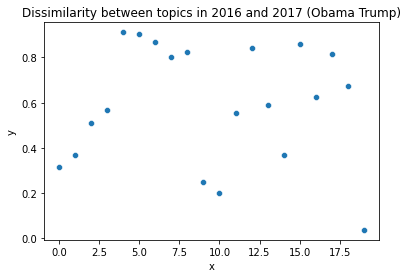

In [116]:
min_dist_arr, min_idx_arr = find_similarity_in_topics(topics_16, topics_17)
print("Mean min distance between topics in 2016 and 2017 (Obama-Trump):", round(min_dist_arr.mean(), 2))
print()
df = pd.DataFrame({"x":range(20), "y": min_dist_arr})
sns.scatterplot(data=df, x="x", y="y").set_title("Dissimilarity between topics in 2016 and 2017 (Obama Trump)");

# A few topics (6 topics have a score < 0.4) are really simiar between Obama and Trump
# the closest has a score close to 0!
print(min_dist_arr[19])
print(topics_16[19])
print(topics_17[min_idx_arr[19]])
print()

##Panel for years 2020-2021

In [117]:
panel_20_21 = []
for i in range(2020, 2022):
    s = str(i)
    filelist = glob.glob(BASE_DIR+f"docs/{s}-*.xml")
    filelist += glob.glob(BASE_DIR+f"docs/C1-{s}-*.xml")
    filelist += glob.glob(BASE_DIR+f"docs/C2-{s}-*.xml")
    filelist += glob.glob(BASE_DIR+f"docs/R1-{s}-*.xml")

    print(f"year: {s}, # of files: {len(filelist)}")
    for filename in tqdm(filelist):
        with open(filename, encoding="utf-8") as open_file:
            content = open_file.read()
            
            soup = BeautifulSoup(content, "xml")
            panel_20_21.append(soup.find('SUBJECT').get_text())
            if soup.find('SUM') is not None:
                panel_20_21.append(soup.find('SUM').get_text())

year: 2020, # of files: 286


100%|██████████| 286/286 [00:25<00:00, 11.41it/s]


year: 2021, # of files: 81


100%|██████████| 81/81 [00:01<00:00, 40.76it/s]


##20 Topics and Top 10 words for 2020-21

In [119]:
topics_2021 = process_panel(panel_20_21)

# Covid 19 rule
# loan, mortgage
# Federal Reserve, governors
# CFTC

topic 0: ['commission', 'securities', 'agenda', 'exchange', 'securities exchange', 'act', 'regulatory', 'exchange commission', 'flexibility', 'summary securities']
topic 1: ['amendments', 'commission', 'proposed', 'proposing', 'document', '2020', 'non', 'summary', 'commission proposing', 'proposed amendments']
topic 2: ['commission', 'commodity', 'amendments', 'certain', 'futures', 'trading', 'summary', 'regulations', 'act', 'exchange']
topic 3: ['guidance', 'rule', 'statement', 'supervisory', 'financial', 'final rule', 'final', 'law', 'bureau', 'supervisory guidance']
topic 4: ['investment', 'companies', 'security', 'funds', 'certain', 'capital', 'based', 'fund', 'investment companies', 'security based']
topic 5: ['act', 'dodd', 'frank', 'dodd frank', 'bureau', 'consumer', 'protection', 'regulation', 'frank act', '19']
topic 6: ['loan', 'loans', 'program', 'mortgage', 'qm', 'protection', 'federal', 'facility', 'regulation', 'certain']
topic 7: ['comment', 'period', 'proposed', 'propos